###**Helper Functions Definition**

In [148]:
# Pie chart plotter function
def piechart_plotter(data, labels, title, figsize):
  
  fig, ax = plt.subplots(figsize=figsize, subplot_kw=dict(aspect="equal"))

  def func(pct, allvals):
    absolute = int(np.round(pct/100.*np.sum(allvals)))
    if pct > 2:
      return "{:.1f}%\n({:d})".format(pct, absolute)
    else: 
      return ""

  wedges, texts, autotexts = ax.pie(data, autopct=lambda pct: func(pct, data),
                                    textprops=dict(color="w"))

  ax.legend(wedges, labels,
            loc="center left",
            bbox_to_anchor=(1, 0, 0.5, 1))

  plt.setp(autotexts, size=8, weight="bold")

  ax.set_title(title)

  plt.show()

In [149]:
from wordcloud import WordCloud

def plot_wordcloud_from_tweets(preprocessed_tweets):
  text = " ".join(" ".join(tweet) for tweet in preprocessed_tweets)

  # Generate a word cloud image
  wordcloud = WordCloud(stopwords=[], colormap='winter', background_color="black").generate(text)

  # Display the generated image:
  # the matplotlib way:
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud, interpolation='bilinear')
  plt.axis("off")
  plt.show()


###**Package Importation and Data Acquisition**

In [150]:
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import datetime as dt
import pickle

In [151]:
# Reading collected and extracted tweets file (using long covid keywords)
datapath = "../data/"
#filename = "tweets_2022_04_12-08_34_59_AM.pkl"
#with open(datapath + filename, "rb") as fp:
#    b = pickle.load(fp)
# Checking the data fields, types and proportion of null values
#df = pd.DataFrame.from_dict(b)
#df.info()

In [152]:
df = pd.read_csv(datapath + 'concatenated_df_2022_04_12-08_34_59_AM.csv')
df.info()

C:\Users\hayadi\AppData\Local\Temp\ipykernel_1056\235753921.py:1: DtypeWarning: Columns (13,14,37,38) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(datapath + 'concatenated_df_2022_04_12-08_34_59_AM.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 332131 entries, 0 to 332130
Data columns (total 39 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        332131 non-null  object 
 1   created_at                 332131 non-null  object 
 2   id                         332131 non-null  float64
 3   id_str                     332131 non-null  float64
 4   text                       332131 non-null  object 
 5   source                     332131 non-null  object 
 6   truncated                  332131 non-null  bool   
 7   in_reply_to_status_id      54763 non-null   float64
 8   in_reply_to_status_id_str  54763 non-null   float64
 9   in_reply_to_user_id        56844 non-null   float64
 10  in_reply_to_user_id_str    56844 non-null   float64
 11  in_reply_to_screen_name    56844 non-null   object 
 12  user                       332131 non-null  object 
 13  geo                        29

In [116]:
# Checking some rows of the data 
df.head()

,_id,created_at,id,id_str,text,source,truncated,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,...,lang,timestamp_ms,quoted_status_id,quoted_status_id_str,quoted_status,quoted_status_permalink,extended_tweet,display_text_range,pseudonymized,withheld_in_countries
0,60a79407043826a0a7b1b11f,Fri May 21 11:03:33 +0000 2021,1.395697e+18,1.395697e+18,RT @lethiecv: #J447 de #LongCovid \n#J232 (7 m...,"<a href=""http://twitter.com/download/android"" ...",False,NaN,NaN,NaN,...,fr,1.621595e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,60a7a998043826a0a7b2d0c2,Fri May 21 12:32:11 +0000 2021,1.395719e+18,1.395719e+18,#covidlong #LongCovid #apresJ20,"<a href=""http://twitter.com/download/iphone"" r...",False,1.395716e+18,1.395716e+18,1.298868e+18,...,und,1.621600e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,60a7bc9b043826a0a7b41ea9,Fri May 21 13:57:35 +0000 2021,1.395741e+18,1.395741e+18,#apresJ20 \n🤔\nhttps://t.co/H6mqURHflJ,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,und,1.621605e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,60a7be56043826a0a7b44990,Fri May 21 14:01:16 +0000 2021,1.395741e+18,1.395741e+18,#apresJ20 \nSuramine l antidote anti covid 🤔\n...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",False,NaN,NaN,NaN,...,it,1.621606e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,60aca8e4043826a0a7b6211c,Tue May 25 07:28:54 +0000 2021,1.397092e+18,1.397092e+18,#J451 - L’article de @SuzanneBruneau1 sur mon ...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",True,NaN,NaN,NaN,...,fr,1.621928e+12,1.396804e+18,1.396804e+18,{'created_at': 'Mon May 24 12:22:33 +0000 2021...,"{'url': 'https://t.co/H5wVfNpllE', 'expanded':...",{'full_text': '#J451 - L’article de @SuzanneBr...,NaN,NaN,NaN


In [121]:
df.drop_duplicates(subset=['id'], inplace=True, ignore_index=True)

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305931 entries, 0 to 305930
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        305931 non-null  object 
 1   created_at                 305931 non-null  object 
 2   id                         305931 non-null  float64
 3   id_str                     305931 non-null  float64
 4   text                       305931 non-null  object 
 5   source                     305931 non-null  object 
 6   truncated                  305931 non-null  bool   
 7   in_reply_to_status_id      50082 non-null   float64
 8   in_reply_to_status_id_str  50082 non-null   float64
 9   in_reply_to_user_id        51991 non-null   float64
 10  in_reply_to_user_id_str    51991 non-null   float64
 11  in_reply_to_screen_name    51991 non-null   object 
 12  user                       305931 non-null  object 
 13  geo                        27

### **Preliminary Preprocessing**



*   Reformatting some columns (user data, dates, tweets ...)
*   Extracting the sample on which the initial preprocessing will be performed

In [131]:
df.user

0         {'id': 1173501470345445376, 'id_str': '1173501...
1         {'id': 1298867975957684224, 'id_str': '1298867...
2         {'id': 1325373633502572544, 'id_str': '1325373...
3         {'id': 1325373633502572544, 'id_str': '1325373...
4         {'id': 37757950, 'id_str': '37757950', 'name':...
                                ...                        
305926    {'id': 1110289477291913216, 'id_str': '1110289...
305927    {'id': 1352474226314235905, 'id_str': '1352474...
305928    {'id': 66919545, 'id_str': '66919545', 'name':...
305929    {'id': 890168676548136960, 'id_str': '89016867...
305930    {'id': 2994604497, 'id_str': '2994604497', 'na...
Name: user, Length: 305931, dtype: object

In [132]:
# Extracting the user dictionary column into a dataframe
users_df = pd.json_normalize(df.user)
users_df.rename(columns={"id": "user_id", "created_at":"user_created_at"}, inplace=True)
users_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305931 entries, 0 to 305930
Empty DataFrame

In [133]:
# Concatenating the user dataframe to the original one
users_df.dropna(axis=1, how='all', inplace=True)
df = pd.concat([df, users_df], axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305931 entries, 0 to 305930
Data columns (total 41 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   _id                        305931 non-null  object 
 1   created_at                 305931 non-null  object 
 2   id                         305931 non-null  float64
 3   id_str                     305931 non-null  float64
 4   text                       305931 non-null  object 
 5   source                     305931 non-null  object 
 6   truncated                  305931 non-null  bool   
 7   in_reply_to_status_id      50082 non-null   float64
 8   in_reply_to_status_id_str  50082 non-null   float64
 9   in_reply_to_user_id        51991 non-null   float64
 10  in_reply_to_user_id_str    51991 non-null   float64
 11  in_reply_to_screen_name    51991 non-null   object 
 12  user                       305931 non-null  object 
 13  geo                        27

In [134]:
# Creating a column containing full tweets (without Truncation)
df['full_tweet'] = df.apply(lambda x: x['extended_tweet']['full_text'] if type(x['extended_tweet'])==dict else x['text'], axis=1)
# Creating a column in the datetime format is YYYY-MM-DD for easier timeseries analysis
df['created_at_ymd'] =  pd.to_datetime(df['created_at']).dt.date
# Creating a column with any sort of geolocation information (extracted from the other columns: place or country)
# df['loc'] = df.apply(lambda x: x['place']['country'] if x['place'] else x['location'], axis=1)
# Extracting the dataframe sample on which the initial preprocessing will be performed
# sampled_df = df[['id', 'created_at', 'created_at_ymd', 'full_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'timestamp_ms', 'retweeted_status', 'user_id', 'name', 'screen_name', 'description', 'followers_count', 'user_created_at', 'loc']]

In [135]:
sampled_df = df[['id', 'created_at', 'created_at_ymd', 'full_tweet', 'quote_count', 'reply_count', 'retweet_count', 'favorite_count', 'favorited', 'retweeted', 'lang', 'timestamp_ms', 'retweeted_status']]

In [136]:
sampled_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305931 entries, 0 to 305930
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                305931 non-null  float64
 1   created_at        305931 non-null  object 
 2   created_at_ymd    305931 non-null  object 
 3   full_tweet        305931 non-null  object 
 4   quote_count       305931 non-null  float64
 5   reply_count       305931 non-null  float64
 6   retweet_count     305931 non-null  float64
 7   favorite_count    305931 non-null  float64
 8   favorited         305931 non-null  bool   
 9   retweeted         305931 non-null  bool   
 10  lang              305931 non-null  object 
 11  timestamp_ms      305931 non-null  float64
 12  retweeted_status  214259 non-null  object 
dtypes: bool(2), float64(6), object(5)
memory usage: 26.3+ MB


### **Initial Data Visualization**

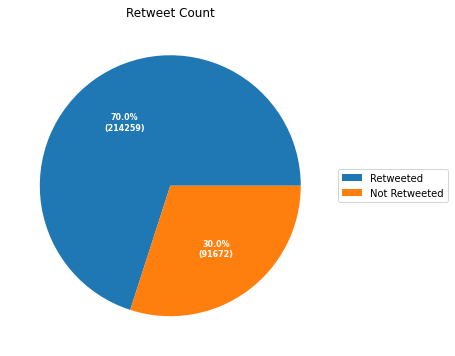

In [144]:
# Seperating retweeted and non retweeted tweets
sampled_retweet_df = sampled_df.dropna(subset=['retweeted_status'])
sampled_no_retweet_df = sampled_df[sampled_df[['retweeted_status']].isna().any(axis=1)]
# Plotting retweet percentage
data = [len(sampled_retweet_df), len(sampled_no_retweet_df)]
labels = ["Retweeted", "Not Retweeted"]

piechart_plotter(data, labels, title="Retweet Count", figsize=(8,6))

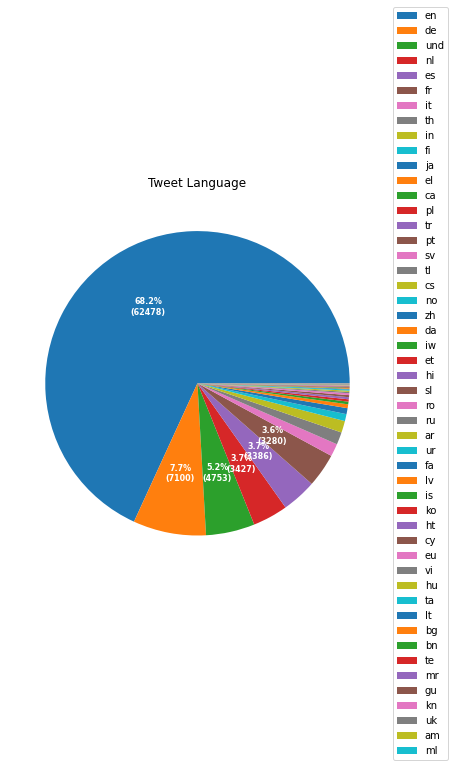

In [145]:
non_retweeted_lang_count = sampled_no_retweet_df['lang'].value_counts()
# Plotting tweet language proportion
data = non_retweeted_lang_count.to_list()
labels = non_retweeted_lang_count.index

piechart_plotter(data, labels, title="Tweet Language", figsize=(8,7))

In [142]:
# Seperating tweets with a location and those without a location
#sampled_no_retweet_loc_df = sampled_no_retweet_df.dropna(subset=['loc'])
#sampled_no_retweet_no_loc_df = sampled_no_retweet_df[sampled_no_retweet_df[['loc']].isna().any(axis=1)]
# Plotting tweets with location proportion
#data = [len(sampled_no_retweet_loc_df), len(sampled_no_retweet_no_loc_df)]
#labels = ["With Location", "Without Location"]

#piechart_plotter(data, labels, title="User Location", figsize=(8,6))

In [147]:
sampled_df

,id,created_at,created_at_ymd,full_tweet,quote_count,reply_count,retweet_count,favorite_count,favorited,retweeted,lang,timestamp_ms,retweeted_status
0,1.395697e+18,Fri May 21 11:03:33 +0000 2021,2021-05-21,RT @lethiecv: #J447 de #LongCovid \n#J232 (7 m...,0.0,0.0,0.0,0.0,False,False,fr,1.621595e+12,{'created_at': 'Fri May 21 10:38:02 +0000 2021...
1,1.395719e+18,Fri May 21 12:32:11 +0000 2021,2021-05-21,#covidlong #LongCovid #apresJ20,0.0,0.0,0.0,0.0,False,False,und,1.621600e+12,NaN
2,1.395741e+18,Fri May 21 13:57:35 +0000 2021,2021-05-21,#apresJ20 \n🤔\nhttps://t.co/H6mqURHflJ,0.0,0.0,0.0,0.0,False,False,und,1.621605e+12,NaN
3,1.395741e+18,Fri May 21 14:01:16 +0000 2021,2021-05-21,#apresJ20 \nSuramine l antidote anti covid 🤔\n...,0.0,0.0,0.0,0.0,False,False,it,1.621606e+12,NaN
4,1.397092e+18,Tue May 25 07:28:54 +0000 2021,2021-05-25,#J451 - L’article de @SuzanneBruneau1 sur mon ...,0.0,0.0,0.0,0.0,False,False,fr,1.621928e+12,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
305926,1.513768e+18,Tue Apr 12 06:34:45 +0000 2022,2022-04-12,RT @djvanness: So here's the thing about #Long...,0.0,0.0,0.0,0.0,False,False,en,1.649745e+12,{'created_at': 'Mon Apr 11 11:44:57 +0000 2022...
305927,1.513768e+18,Tue Apr 12 06:34:49 +0000 2022,2022-04-12,"RT @MoriartyLab: As promised,\n\nApril 7 COVID...",0.0,0.0,0.0,0.0,False,False,en,1.649745e+12,{'created_at': 'Mon Apr 11 22:50:11 +0000 2022...
305928,1.513768e+18,Tue Apr 12 06:34:49 +0000 2022,2022-04-12,"RT @sherryhanna53: Please, all Canadians read ...",0.0,0.0,0.0,0.0,False,False,en,1.649745e+12,{'created_at': 'Mon Apr 11 17:40:13 +0000 2022...
305929,1.513768e+18,Tue Apr 12 06:34:51 +0000 2022,2022-04-12,RT @BeautyDiaryNews: ใครที่บอกว่าติดๆไปเหอะโคว...,0.0,0.0,0.0,0.0,False,False,th,1.649745e+12,{'created_at': 'Mon Apr 11 05:13:44 +0000 2022...


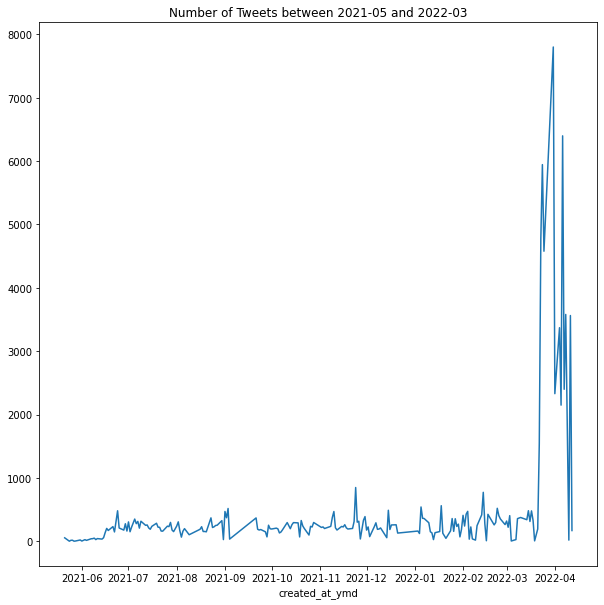

In [146]:
# Evolution of the number of tweets overtime
sampled_no_retweet_df.groupby(by = ['created_at_ymd']).count()['id'].plot(title="Number of Tweets between 2021-05 and 2022-03", figsize=(10,10))
plt.show()

In [20]:
# Assessing the number of tweets per user
tweets_per_user = sampled_no_retweet_df.groupby(by = ['user_id']).count()['full_tweet']
tweets_per_user.describe()

count    34979.000000
mean         1.532205
std          2.636878
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        202.000000
Name: full_tweet, dtype: float64

In [21]:
# Top users with posts on long covid
sorted_tweets_per_user = tweets_per_user.sort_values(axis=0, ascending=False, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None)
sorted_tweets_per_user

user_id
1304036484920606720    202
1480071384600485889    149
301352485              103
1282997894463840256     97
3191893256              97
                      ... 
1062423344               1
1061974321               1
1061908434               1
1061646169               1
1513401310368120832      1
Name: full_tweet, Length: 34979, dtype: int64

### **Text Preprocessing and Discovery**

#### Installations and function definitions

In [22]:
!pip install contractions
!pip install word-forms
!pip install -U deep-translator

In [23]:
import re, string, unicodedata
import nltk
import contractions # expanding contractions
import inflect # natural language related tasks of generating plurals, singular nouns, etc.
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer
from nltk.tokenize import TweetTokenizer
import string


#nltk.download('punkt')
#nltk.download('stopwords')
#nltk.download('wordnet')

In [24]:
import nltk
#nltk.download('omw-1.4')
nltk.download('averaged_perceptron_tagger')
nltk.download('omw-1.4')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [25]:
import sys
sys.path.append("../utils/preprocess")

In [26]:
from preprocess import Preprocess
prep = Preprocess()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [27]:
#import re

#def multiple_replacer(*key_values):
#    replace_dict = dict(key_values)
#    replacement_function = lambda match: replace_dict[match.group(0)]
#    pattern = re.compile("|".join([re.escape(k) for k, v in key_values]), re.M)
#    return lambda string: pattern.sub(replacement_function, string)

#def multiple_replace(string, *key_values):
#    return multiple_replacer(*key_values)(string)

#replacements = (u"long covid", u"longcovid"), (u"covid long", u"longcovid"), (u"covidlong", u"longcovid"), (u"covid nineteen", u"covid"), (u"corona", u"covid"), (u"long term", u"longterm")

In [28]:
def preprocess_tweet(tweet):
    
    tweet = prep.replace_contractions(tweet)
    #tweet = prep.replace_special_words(tweet)
    tweet = prep.replace_hashtags_URL_USER(tweet, mode_URL="delete", mode_Mentions="delete", mode_Hashtag="replace")
    tweet = prep.tokenize(tweet)
    tweet = prep.remove_punctuation(tweet)
    tweet = prep.preprocess_emojis(tweet)
    tweet = prep.preprocess_emoticons(tweet)
    tweet = prep.remove_non_ascii(tweet)
    tweet = prep.to_lowercase(tweet)
    tweet = prep.replace_numbers(tweet)
    tweet = prep.remove_stopwords(tweet)
    tweet = prep.lemmatize_verbs(tweet)
    #tweet= multiple_replace(" ".join(tweet), *replacements)
    #tweet = prep.stem_words(tweet)
    
    return tweet

def preprocess_tweets(tweets):
    return [preprocess_tweet(tweet) for tweet in tweets if tweet]


In [29]:
from deep_translator import GoogleTranslator

def translate_tweets(tweets, target_language='en'):
    return [GoogleTranslator(source='auto', target=target_language).translate(tweet) for tweet in tweets]

#### English tweets discovery

In [30]:
preprocessed_tweets = preprocess_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='en']['full_tweet'].to_list())

INFO: No category set for emoji ☣ -> delete emoji :biohazard:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🌷 -> delete emoji :tulip:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🙊 -> delete emoji :speak-no-evil_monkey:
INFO: No category set for emoji 🙉 -> delete emoji :hear-no-evil_monkey:
INFO: No category set for emoji ▫ -> delete emoji :white_

INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 💀 -> delete

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🍷 -> delete emoji :wine_glass:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🎼 -> delete emoji :musical_score:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🏴 -> delete emoji :black_flag:
INFO: No category set for emoji 🤔 ->

INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji ❓ -> delete emoji :question_mark:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🎧 -> delete emoji :headphone:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🖕 -> delete emoji :middle_finger:
INFO: No category set for emoji 🔀 -> delete emoji :shuffle_tracks_button:
I

INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ◾ -> delete emoji :black_medium-small_square:
INFO: No category set for emoji ◾ -> delete emoji :black_medium-small_square:
INFO: No category set for emoji ◾ -> delete emoji :black_medium-small_square:
INFO: No category set for emoji ◾ -> delete emoji :black_medium-small_square:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👁 -> delete emoji :eye:
INFO: No catego

INFO: No category set for emoji 🔺 -> delete emoji :red_triangle_pointed_up:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🔺 -> delete emoji :red_triangle_pointed_up:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 📍 -> delete emoji :round_pushpin:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 🤒 -> delete emoji :face_with_thermometer:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 🏴 -> delete em

INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for emoji 🏀 -> delete emoji :basketball:
INFO: No category set for emoji 🙋 -> delete emoji :person_raising_hand:
INFO: No category set for emoji 🌞 -> delete emoji :sun_with_face:
INFO: No category set for emoji 🦄 -> delete emoji :unicorn_face:
INFO: No category set for emoji 🚀 -> delete emoji :rocket:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 😖 -> delete emoji :confounded_face:
INFO: No category set for emoji 🌐 -> delete emoji :globe_with_meridians:
INFO: No category set for emoji ⬇ -> delete emoji :down_arro

INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji ☕ -> delete emoji :hot_beverage:
INFO: No category set for emoji 🌻 -> delete emoji :sunflower:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🔥 -> delete emoji :fire:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👽 -> delete emoji :alien:
INFO: No category set for emoji 👽 -> delete emoji :alien:
INFO: No category set for emoji ⚠ -> delete emoji :warning:
INFO: No category set for emoji 🆘 -> delete emoji :SOS_button:
INFO: No category

INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💀 -> delete emoji :skull:
INFO: No category set for emoji 🐑 -> delete emoji :sheep:
INFO: No category set for emoji ⭐ -> delete emoji :white_medium_star:
INFO: No category set for emoji 🏵 -> delete emoji :rosette:
INFO: No category set for emoji 🎸 -> delete emoji :guitar:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 🦋 -> delete emoji :butterfly:
INFO: No category set for emoji 📌 -> delete emoji :pushpin:
INFO: No category set for emoji 📌 -> delete emoji :pushpin:
INFO: No category set for emoji 📌 -> delete emoji :pushpin:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set fo

INFO: No category set for emoji 🚘 -> delete emoji :oncoming_automobile:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji 💃 -> delete emoji :woman_dancing:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 📢 -> delete emoji :loudspeaker:
INFO: No category set for emoji 🎧 -> delete emoji :headphone:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji ⬆ -> delete emoji 

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😏 -> delete emoji :smirking_face:
INFO: Could not replace emoticon: Dx of the word: Dx (<class 'KeyError'>, KeyError('Dx'), <traceback object at 0x00000261C4A226C0>)
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 💤 -> delete emoji :zzz:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji ❣ -> delete emoji :heavy_heart_exclamation:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 😣 -

INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 🚨 -> delete emoji :police_car_light:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 🌐 -> delete emoji :globe_with_meridians:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_

INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ⬛ -> delete emoji :black_large_square:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 🙏 -> delete emoji :folded_h

INFO: No category set for emoji ⁉ -> delete emoji :exclamation_question_mark:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤕 -> delete emoji :face_with_head-bandage:
INFO: No category set for emoji 🤧 -> delete emoji :sneezing_face:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💨 -> delete emoji :dashing_away:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🥂 -> delete emoji :clinking_gla

INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⚡ -> delete emoji :high_voltage:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 😉 -> delete emoji :winking_fac

INFO: No category set for emoji 🦋 -> delete emoji :butterfly:
INFO: No category set for emoji 🦋 -> delete emoji :butterfly:
INFO: No category set for emoji 🦋 -> delete emoji :butterfly:
INFO: No category set for emoji 🦋 -> delete emoji :butterfly:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👌 -> delete emoji :OK_hand:
INFO: No category set for emoji ☝ -> delete emoji :index_pointing_up:
INFO: No category set for em

INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😬 -> delete emoji :grimacing_face:
INFO: No category set for emoji 😬 -> de

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 💊 -> delete emoji :pill:
INFO: No category set for emoji 😟 -> delete emoji :worried_face:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 🥊 -> delete emoji :boxing_glove:
INFO: No category set for emoji ☀ -> delete emoji :sun:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🕯 -> delete emoji :candle:
INFO: No category set for emoji 🕯 -> delete emoji :candle:
INFO: No category set for emoji 🕯 -> delete emoji :candle:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🌈 -> delete emoji :rainbow:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🤞 -> delete e

INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 🌉 -> delete emoji :bridge_at_night:
INFO: No category set for 

INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🌍 -> delete emoji :globe_showing_Europe-Africa:
INFO: No category set for emoji ⏰ -> delete emoji :alarm_clock:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤝 -> delete emoji :handshake:
INFO: No category set for emoji 🤝 -> delete emoji :handshake:
INFO: No category set for emoji 🤝 -> delete emoji :handshake:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji ✅ -> delete em

INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 😅 -> delete emoji :smiling_face_with_open_mouth_&_cold_sweat:
INFO: No category set for emoji 🗣 -> delete emoji :speaking_head:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👆 -> delete emoji :backhand_index_pointing_up:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 👎 -> delete emoji :thumbs_down:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji ⭐ -> delete emoji :white_medium_star:

INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🎯 -> delete emoji :direct_hit:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🎵 -> delete emoji :musical_note:
INFO: No category set for emoji 🎵 -> delete emoji :musical_note:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ™ -> delete emoji :trade_mark:
INFO: No category set for e

INFO: No category set for emoji ✌ -> delete emoji :victory_hand:
INFO: No category set for emoji ® -> delete emoji :registered:
INFO: No category set for emoji 🚩 -> delete emoji :triangular_flag:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category set for emoji 🎗 -> delete emoji :reminder_ribbon:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 📰 -> delete emoji :newspaper:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INF

INFO: No category set for emoji 📚 -> delete emoji :books:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji 😑 -> delete emoji :expressionless_face:
INFO: No category set for emoji 🐱 -> delete emoji :cat_face:
INFO: No category set for emoji 👋 -> delete emoji :waving_hand:
INFO: No category set for emoji ⚠ -> delete emoji :warning:
INFO: No category set for emoji ☣ -> delete emoji :biohazard:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👹 -> delete emoji :ogre:
INFO: No category set for emoji ✅ -> delete emoji :white_heavy_check_mark:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:


INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🖤 -> delete emoji :black_heart:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji ☠ -> delete emoji :skull_and_crossbones:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🌺 -> delete emoji :hibiscus:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 😪 -> delete emoji :sleepy_face:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🌎 -> delete emoji :globe_showing_Americas:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji ⚽ -> delete emoji :soccer_ball:
INFO: No category set for emoji 😎 -> delete emoji :smiling_face_with_sunglasses:
INFO: No category set for emoji 🍺 -> del

INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🙈 -> delete emoji :see-no-evil_monkey:
INFO: No category set for emoji 👏 -> delete emoji :clapping_hands:
INFO: No category set for emoji 😝 -> delete emoji :face_with_stuck-out_tongue_&_closed_eyes:
INFO: No category set for emoji 🤐 -> delete emoji :zipper-mouth_face:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🤞 -> delete emoji :crossed_fingers:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 💉 -> delete emoji :syringe:
INFO: No category set for emoji 🌏 -> delete emoji :globe_showing_Asia-Australia:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for

INFO: No category set for emoji 👊 -> delete emoji :oncoming_fist:
INFO: No category set for emoji 💥 -> delete emoji :collision:
INFO: No category set for emoji 🐝 -> delete emoji :honeybee:
INFO: No category set for emoji 💔 -> delete emoji :broken_heart:
INFO: No category set for emoji 🤷 -> delete emoji :person_shrugging:
INFO: No category set for emoji 👇 -> delete emoji :backhand_index_pointing_down:
INFO: No category set for emoji 🏴 -> delete emoji :black_flag:
INFO: No category set for emoji 👀 -> delete emoji :eyes:
INFO: No category set for emoji ✨ -> delete emoji :sparkles:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 😐 -> delete emoji :neutral_face:
INFO: No category set for emoji 👉 -> delete emoji :backhand_index_pointing_right:
INFO: No category set for emoji 😴 -> delete emoji :sleeping_face:
INFO: No category set for emoji 😣 -> delete emoji :persevering_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
I

INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬇ -> delete emoji :down_arrow:
INFO: No category set for emoji ❗ -> delete emoji :exclamation_mark:
INFO: No category set for emoji ♨ -> delete emoji :hot_springs:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ⬆ -> delete emoji :up_arrow:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji ☹ -> delete emoji :frowning_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🔗 -> delete emoji :link:
INFO: No category set for emoji 🙏 -> delete emoji :folded_hands:
INFO: No category set for emoji 👈 -> delete emoji :backhand_index_pointing_left:
INFO: No category set for emoji 💯 -> delete emoji :hundred_points:
INFO: No category 

In [32]:
preprocessed_tweets

[['irs',
  'steal',
  'one thousand, five hundred',
  'refund',
  'explanation',
  'account',
  'look',
  'like',
  'get',
  'covid',
  'stimulus',
  'money',
  'back',
  'one',
  'way',
  'another',
  'life-long',
  'government',
  'criminal',
  'know',
  'nothing',
  'else',
  'cheat',
  'steal'],
 ['covid',
  'always',
  'play',
  'well',
  'human',
  'psychology',
  'hard',
  'make',
  'people',
  'care',
  'mild',
  'case',
  'multiple',
  'time',
  'tend',
  'think',
  'immediate',
  'virus',
  'long-term',
  'politician',
  'effect',
  'show',
  'next',
  'election',
  'exist'],
 ['please',
  'message',
  'community',
  'long',
  'term',
  'risk',
  'covid',
  'infection',
  'strongly',
  'endorse',
  'mask',
  'everyone',
  'school'],
 ['bishop',
  'n',
  'ahimbisibwe',
  'hts',
  'school',
  'host',
  'ht',
  'always',
  'challenge',
  'since',
  'covid',
  'nineteen',
  'hit',
  'u',
  'role',
  'take',
  'new',
  'dimension',
  'discuss',
  'potential',
  'long',
  'term',
 

In [34]:
# Use list comprehension to convert a list of lists to a flat list 
all_words = [ item for elem in preprocessed_tweets for item in elem]

In [35]:
all_words

['irs',
 'steal',
 'one thousand, five hundred',
 'refund',
 'explanation',
 'account',
 'look',
 'like',
 'get',
 'covid',
 'stimulus',
 'money',
 'back',
 'one',
 'way',
 'another',
 'life-long',
 'government',
 'criminal',
 'know',
 'nothing',
 'else',
 'cheat',
 'steal',
 'covid',
 'always',
 'play',
 'well',
 'human',
 'psychology',
 'hard',
 'make',
 'people',
 'care',
 'mild',
 'case',
 'multiple',
 'time',
 'tend',
 'think',
 'immediate',
 'virus',
 'long-term',
 'politician',
 'effect',
 'show',
 'next',
 'election',
 'exist',
 'please',
 'message',
 'community',
 'long',
 'term',
 'risk',
 'covid',
 'infection',
 'strongly',
 'endorse',
 'mask',
 'everyone',
 'school',
 'bishop',
 'n',
 'ahimbisibwe',
 'hts',
 'school',
 'host',
 'ht',
 'always',
 'challenge',
 'since',
 'covid',
 'nineteen',
 'hit',
 'u',
 'role',
 'take',
 'new',
 'dimension',
 'discuss',
 'potential',
 'long',
 'term',
 'shift',
 'covid',
 'nineteen',
 'build',
 'better',
 'future',
 'pandemic',
 'damage',

In [37]:
from collections import Counter
word_frequencies = Counter(all_words)

In [38]:
word_frequencies.most_common()

[('covid', 32941),
 ('long', 24904),
 ('get', 6334),
 ('longcovid', 6111),
 ('people', 5632),
 ('nineteen', 4245),
 ('know', 3714),
 ('go', 3165),
 ('u', 3141),
 ('one', 3118),
 ('like', 2668),
 ('symptom', 2641),
 ('time', 2636),
 ('year', 2588),
 ('two', 2581),
 ('many', 2404),
 ('vaccine', 2404),
 ('take', 2292),
 ('still', 2280),
 ('say', 2225),
 ('need', 2223),
 ('health', 2207),
 ('would', 2166),
 ('term', 2078),
 ('work', 1960),
 ('even', 1871),
 ('think', 1852),
 ('see', 1820),
 ('risk', 1801),
 ('infection', 1795),
 ('day', 1689),
 ('make', 1687),
 ('help', 1671),
 ('effect', 1619),
 ('mask', 1613),
 ('child', 1613),
 ('test', 1603),
 ('also', 1598),
 ('new', 1500),
 ('could', 1468),
 ('death', 1463),
 ('study', 1438),
 ('case', 1401),
 ('suffer', 1386),
 ('month', 1357),
 ('let', 1352),
 ('wait', 1276),
 ('cannot', 1271),
 ('week', 1255),
 ('report', 1254),
 ('patient', 1241),
 ('want', 1240),
 ('thing', 1236),
 ('die', 1234),
 ('care', 1218),
 ('much', 1215),
 ('really', 120

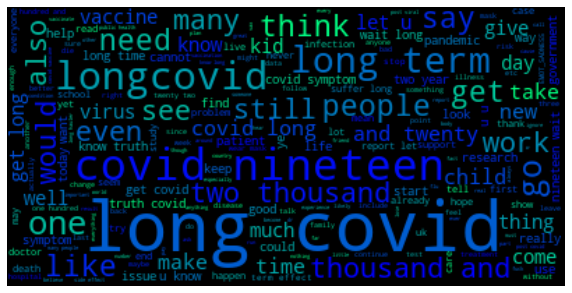

In [31]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_tweets)

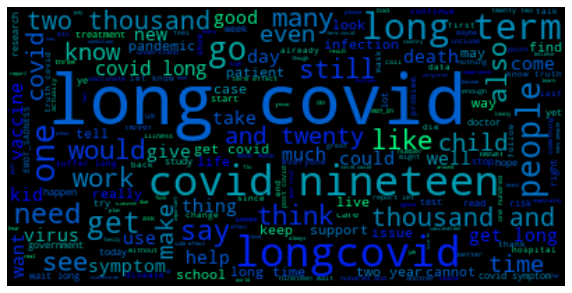

In [166]:
#without stemming 
plot_wordcloud_from_tweets(preprocessed_tweets)

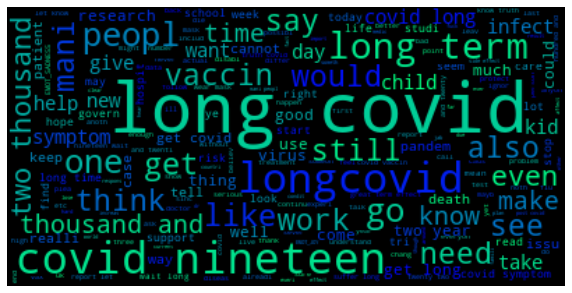

In [33]:
#with stemming
plot_wordcloud_from_tweets(preprocessed_tweets)

#### German tweets discovery (After translation)

In [31]:
translated_german_tweets = translate_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='de']['full_tweet'])

KeyboardInterrupt: 

In [38]:
import pickle

with open(datapath + 'translated/translated_german_' + filename, 'wb') as f:
  pickle.dump(translated_german_tweets, f)

In [46]:
with open(datapath + 'translated/translated_german_' + filename, 'rb') as f:
  translated_german_tweets = pickle.load(f)

In [42]:
len(translated_german_tweets)

3328

In [95]:
preprocessed_german_tweets = preprocess_tweets(translated_german_tweets)

INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji ➡ -> delete emoji :right_arrow:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji ✊ -> delete emoji :raised_fist:
INFO: No category set for emoji 😉 -> delete emoji :winking_face:
INFO: No category set for emoji ‼ -> delete emoji :double_exclamation_mark:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 👍 -> delete emoji :thumbs_up:
INFO: No category set for emoji 💪 -> delete emoji :flexed_biceps:
INFO: No category set for emoji 🤔 -> delete emoji :thinking_face:
INFO: No category set for emoji 🙌 -> delete emoji :raising_hands:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set for emoji 🤡 -> delete emoji :clown_face:
INFO: No category set f

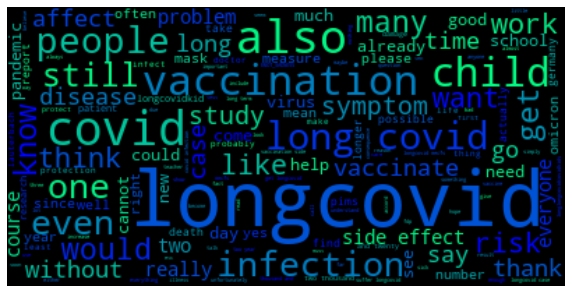

In [58]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#without stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

In [ ]:
#with stemming
plot_wordcloud_from_tweets(preprocessed_german_tweets)

#### French tweets discovery (After translation)

In [59]:
translated_french_tweets = translate_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='fr']['full_tweet'])

In [98]:
import pickle

with open(datapath + 'translated/translated_french_' + filename, 'wb') as f:
  pickle.dump(translated_french_tweets, f)
 

In [45]:
with open(datapath + 'translated/translated_french_' + filename, 'rb') as f:
  translated_french_tweets = pickle.load(f)

In [ ]:
preprocessed_french_tweets = preprocess_tweets(translated_french_tweets)

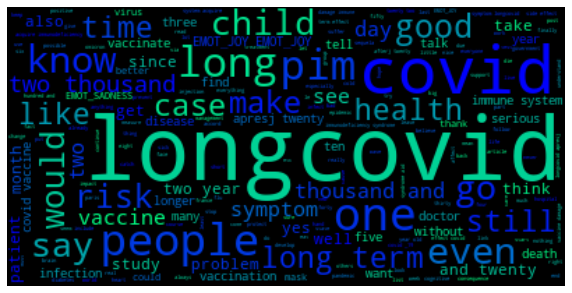

In [86]:
#with replacements and no stemming
plot_wordcloud_from_tweets(preprocessed_french_tweets)

#### Undetermined tweets discovery (After translation)

In [70]:
from deep_translator import single_detection

In [ ]:
lang = [single_detection(x, api_key='258da1680dd99f69a8581230f31d2067') for x in preprocessed_undetermined_tweets if x==x]
print(lang) # output: [fr, en]

In [ ]:
import pickle

with open(home + '/translated_undetermined_tweets.pkl', 'wb') as f:
  pickle.dump(translated_undetermined_tweets, f)
 

In [ ]:
#with open(home + '/translated_german_tweets.pkl', 'rb') as f:
#  mynewlist = pickle.load(f)

In [ ]:
type(translated_undetermined_tweets)

list

In [ ]:
preprocessed_undetermined_tweets = preprocess_tweets(sampled_no_retweet_df[sampled_no_retweet_df['lang']=='und']['full_tweet'])

In [ ]:
preprocessed_undetermined_tweets

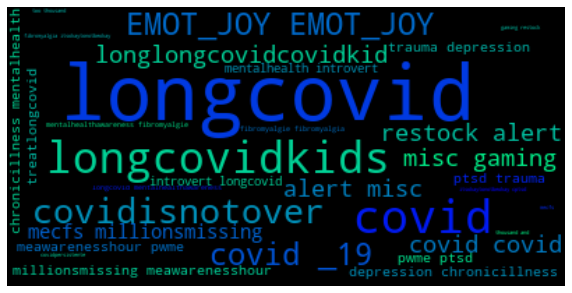

In [79]:
plot_wordcloud_from_tweets(preprocessed_undetermined_tweets)

#### Combined languages tweets discovery (After translation)

In [ ]:
preprocessed_tweets

In [ ]:
en_de_fr_preprocessed_tweets = []
en_de_fr_preprocessed_tweets.extend(preprocessed_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_german_tweets)
en_de_fr_preprocessed_tweets.extend(preprocessed_french_tweets)


In [100]:
len(en_de_fr_preprocessed_tweets)

27433

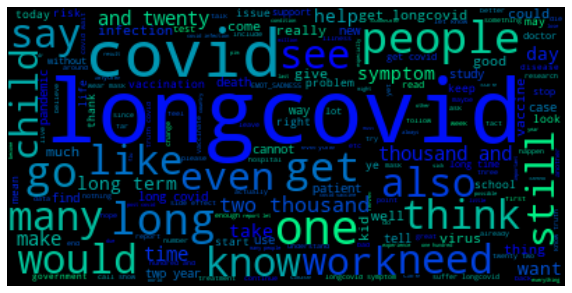

In [101]:
plot_wordcloud_from_tweets(en_de_fr_preprocessed_tweets)

In [2]:
!pip install gensim

  Using cached gensim-4.1.2.tar.gz (23.2 MB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
Using legacy 'setup.py install' for gensim, since package 'wheel' is not installed.
  Running setup.py install for gensim: started
  Running setup.py install for gensim: finished with status 'done'


In [3]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\hayadi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [103]:
stop_words = stopwords.words('english')
stop_words.extend(['and', 'one', 'get', 'go', 'u', 'take', 'one', 'two'])

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

In [107]:
# remove stop words
data_words = remove_stopwords(en_de_fr_preprocessed_tweets)

In [108]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)
# Create Corpus
texts = data_words
# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]
# View
print(corpus[:1][0][:30])


[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 1), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 2), (21, 1), (22, 1), (23, 1)]


In [109]:
from pprint import pprint
# number of topics
num_topics = 5
# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.043*"longcovid" + 0.035*"covid" + 0.018*"vaccine" + 0.016*"long" + '
  '0.011*"know" + 0.010*"people" + 0.009*"vaccination" + 0.008*"effect" + '
  '0.007*"risk" + 0.007*"twenty"'),
 (1,
  '0.032*"longcovid" + 0.024*"covid" + 0.012*"long" + 0.009*"study" + '
  '0.008*"new" + 0.008*"health" + 0.007*"patient" + 0.005*"syndrome" + '
  '0.004*"well" + 0.004*"post"'),
 (2,
  '0.038*"covid" + 0.033*"longcovid" + 0.025*"long" + 0.009*"people" + '
  '0.007*"time" + 0.007*"child" + 0.007*"mask" + 0.007*"year" + 0.006*"say" + '
  '0.006*"like"'),
 (3,
  '0.051*"longcovid" + 0.023*"covid" + 0.014*"people" + 0.008*"many" + '
  '0.008*"symptom" + 0.006*"infection" + 0.006*"would" + 0.006*"also" + '
  '0.006*"know" + 0.005*"vaccination"'),
 (4,
  '0.049*"longcovid" + 0.009*"day" + 0.009*"twenty" + 0.009*"emot_joy" + '
  '0.008*"pims" + 0.007*"people" + 0.006*"mecfs" + 0.006*"covid" + '
  '0.005*"year" + 0.005*"long"')]
